In [1]:
!pip install tensorflow tensorflow-gpu opencv-python matplotlib

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
from google.colab import drive

In [4]:
!pip list

Package                          Version
-------------------------------- ---------------------
absl-py                          1.4.0
aiohttp                          3.9.5
aiosignal                        1.3.1
alabaster                        0.7.16
albumentations                   1.3.1
altair                           4.2.2
annotated-types                  0.6.0
anyio                            3.7.1
appdirs                          1.4.4
argon2-cffi                      23.1.0
argon2-cffi-bindings             21.2.0
array_record                     0.5.1
arviz                            0.15.1
astropy                          5.3.4
astunparse                       1.6.3
async-timeout                    4.0.3
atpublic                         4.1.0
attrs                            23.2.0
audioread                        3.0.1
autograd                         1.6.2
Babel                            2.14.0
backcall                         0.2.0
beautifulsoup4                   4.12.3


In [5]:
import tensorflow as tf
import os
import PIL

In [6]:
gpus = tf.config.experimental.list_physical_devices('CPU')
gpus

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [7]:
gpus= tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
  tf.config.experimental.set_memory_growth(gpu, True)

In [8]:
import cv2
import imghdr
from matplotlib import pyplot as plt
import pathlib as pb

In [9]:
from pathlib import Path

In [10]:
data_dir ="/content/drive/MyDrive/dr_set"

In [11]:
folder_path = "/content/drive/MyDrive/Projects"

In [12]:
def create_folder(folder_path):
    try:
      # Create the folder
        Path(folder_path).mkdir(parents=True, exist_ok=True)
        print(f"Folder '{folder_path}' created successfully!")
    except FileExistsError:
        print(f"Folder '{folder_path}' already exists!")

create_folder(folder_path)


Folder '/content/drive/MyDrive/Projects' created successfully!


In [13]:
img_width = 256
img_width = 256

In [14]:
import os
from PIL import Image

source_directory = '/content/drive/MyDrive/dr_set/colored_images'
def extract_image_data(directory):
    image_paths =[]
    for root, dirs, files in os.walk(directory):
        for file in files:
            if file.endswith(('.jpg', '.png', '.tif')):
                image_path = os.path.join(root, file)
                image_paths.append(image_path)
                print(f"Image data extracted from: {image_path}") # Call the function with the source directory
    return image_paths
DR_extract = extract_image_data(source_directory)


for path in DR_extract :
    print(path)

Image data extracted from: /content/drive/MyDrive/dr_set/colored_images/Mild/00cb6555d108.png
Image data extracted from: /content/drive/MyDrive/dr_set/colored_images/Mild/0124dffecf29.png
Image data extracted from: /content/drive/MyDrive/dr_set/colored_images/Mild/0024cdab0c1e.png
Image data extracted from: /content/drive/MyDrive/dr_set/colored_images/Mild/06b71823f9cd.png
Image data extracted from: /content/drive/MyDrive/dr_set/colored_images/Mild/059bc89df7f4.png
Image data extracted from: /content/drive/MyDrive/dr_set/colored_images/Mild/01b3aed3ed4c.png
Image data extracted from: /content/drive/MyDrive/dr_set/colored_images/Mild/07929d32b5b3.png
Image data extracted from: /content/drive/MyDrive/dr_set/colored_images/Mild/03e25101e8e8.png
Image data extracted from: /content/drive/MyDrive/dr_set/colored_images/Mild/0684311afdfc.png
Image data extracted from: /content/drive/MyDrive/dr_set/colored_images/Mild/09935d72892b.png
Image data extracted from: /content/drive/MyDrive/dr_set/col

In [15]:
len(DR_extract)

1867

In [16]:
import os
from PIL import Image

source_directory = '/content/drive/MyDrive/dr_set/NO_DR'
def extract_image_data(directory):
    image_paths =[]
    for root, dirs, files in os.walk(directory):
        for file in files:
            if file.endswith(('.jpg', '.png', '.tif')):
                image_path = os.path.join(root, file)
                image_paths.append(image_path)
                print(f"Image data extracted from: {image_path}") # Call the function with the source directory
    return image_paths
No_DR_extract = extract_image_data(source_directory)


for path in No_DR_extract :
    print(path)

Image data extracted from: /content/drive/MyDrive/dr_set/NO_DR/No_DR/780f9c237c56.png
Image data extracted from: /content/drive/MyDrive/dr_set/NO_DR/No_DR/78937523f7a8.png
Image data extracted from: /content/drive/MyDrive/dr_set/NO_DR/No_DR/7831ce1d895e.png
Image data extracted from: /content/drive/MyDrive/dr_set/NO_DR/No_DR/789c60cba801.png
Image data extracted from: /content/drive/MyDrive/dr_set/NO_DR/No_DR/789f0ec1eab8.png
Image data extracted from: /content/drive/MyDrive/dr_set/NO_DR/No_DR/79ade634c633.png
Image data extracted from: /content/drive/MyDrive/dr_set/NO_DR/No_DR/7a6495a39d87.png
Image data extracted from: /content/drive/MyDrive/dr_set/NO_DR/No_DR/7ad0c4975890.png
Image data extracted from: /content/drive/MyDrive/dr_set/NO_DR/No_DR/7aabd768abff.png
Image data extracted from: /content/drive/MyDrive/dr_set/NO_DR/No_DR/7a46cfa69bae.png
Image data extracted from: /content/drive/MyDrive/dr_set/NO_DR/No_DR/7a39c91416e2.png
Image data extracted from: /content/drive/MyDrive/dr_s

In [17]:
len(No_DR_extract)

1801

In [18]:
type(DR_extract)

list

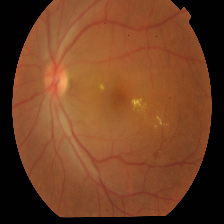

In [19]:
PIL.Image.open(str(DR_extract[48]))

In [20]:
DR_No_dict ={
    "DR": DR_extract,
    "No_DR": No_DR_extract,
}

In [21]:
Labels_dict = {
    "No_DR":0,
    "DR":1,
}

In [22]:
ros = str(DR_No_dict["DR"][0])
ros

'/content/drive/MyDrive/dr_set/colored_images/Mild/00cb6555d108.png'

In [23]:
x , y = [], []

for ex, images in DR_No_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(256,256))
        x.append(resized_img)
        y.append(Labels_dict[ex])

In [24]:
print(len(x), len(y))

3668 3668


In [25]:
import numpy as np

In [26]:
x = np.array(x)
y= np.array(y)

In [27]:
x

array([[[[2, 1, 3],
         [2, 1, 3],
         [2, 1, 3],
         ...,
         [2, 1, 3],
         [2, 1, 3],
         [1, 0, 2]],

        [[2, 1, 3],
         [2, 1, 3],
         [2, 1, 3],
         ...,
         [2, 1, 3],
         [2, 1, 3],
         [2, 1, 3]],

        [[2, 1, 3],
         [2, 1, 3],
         [2, 1, 3],
         ...,
         [2, 1, 3],
         [2, 1, 3],
         [2, 1, 3]],

        ...,

        [[1, 1, 1],
         [1, 1, 1],
         [2, 2, 2],
         ...,
         [2, 2, 2],
         [2, 2, 2],
         [2, 2, 2]],

        [[2, 2, 2],
         [1, 1, 1],
         [2, 2, 2],
         ...,
         [2, 2, 2],
         [1, 1, 1],
         [1, 1, 1]],

        [[2, 1, 3],
         [2, 2, 2],
         [2, 2, 2],
         ...,
         [2, 2, 2],
         [2, 2, 2],
         [2, 2, 2]]],


       [[[2, 1, 3],
         [2, 1, 3],
         [1, 1, 2],
         ...,
         [2, 1, 3],
         [1, 0, 2],
         [1, 0, 2]],

        [[2, 1, 3],
         [2,

In [28]:
y

array([1, 1, 1, ..., 0, 0, 0])

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
x_train , x_test , y_train, y_test = train_test_split(x,y, random_state=0)

In [31]:
x_trained_scaled = x_train / 255
y_trained_scaled = y_train / 255

In [32]:
x_trained_scaled.shape

(2751, 256, 256, 3)

In [33]:
y_trained_scaled

array([0.        , 0.00392157, 0.00392157, ..., 0.00392157, 0.        ,
       0.        ])

In [34]:
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow import keras
from keras.api._v2.keras import regularizers

In [35]:
data_aug = keras.Sequential([
    layers.RandomZoom(0.1),
    #layers.experimental.preprocessing.RandomZoom(0.1)
])

In [36]:
model = Sequential([
    data_aug,

     keras.layers.Conv2D(filters = 64, kernel_size=(2,2) , padding= "same" , activation = "relu"),
     keras.layers.MaxPooling2D(),

     keras.layers.Conv2D(filters = 32, kernel_size=(2,2) , padding= "same" , activation = "relu"),
     keras.layers.MaxPooling2D(),
     keras.layers.Dropout(0.3),

     keras.layers.Conv2D(filters = 16, kernel_size=(2,2) , padding= "same" , activation = "relu"),
     keras.layers.Conv2D(filters = 16, kernel_size=(2,2) , padding= "same" , activation = "relu"),
     keras.layers.MaxPooling2D(),
     keras.layers.Dropout(0.3),

     keras.layers.Conv2D(filters = 32, kernel_size=(2,2) , padding= "same" , activation = "relu"),
     keras.layers.MaxPooling2D(),


    keras.layers.Flatten(),
    keras.layers.Dense(256,activation="relu"),
    keras.layers.Dense(1, activation='sigmoid')

])

#      keras.layers.Conv2D(filters = 32, kernel_size=(2,2) , padding= "same" , activation = "relu"),
#      keras.layers.MaxPooling2D(),
#      keras.layers.Dropout(0.3),
#      keras.layers.Conv2D(filters = 64, kernel_size=(2,2) , padding= "same" , activation = "relu"),
#      keras.layers.MaxPooling2D(),
#      keras.layers.Dropout(0.3),
#      keras.layers.Conv2D(filters = 64, kernel_size=(2,2) , padding= "same" , activation = "relu"),
#      keras.layers.MaxPooling2D(),
#      keras.layers.Dropout(0.3),
#      keras.layers.Conv2D(filters = 128, kernel_size=(2,2) , padding= "same" , activation = "relu"),
#      keras.layers.MaxPooling2D(),


#     keras.layers.Flatten(),
#     keras.layers.Dense(256,activation="relu"),
#     keras.layers.Dense(1, activation='sigmoid')

# ])


model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
             loss=tf.losses.BinaryCrossentropy(),
             metrics = ["accuracy", tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])

In [ ]:
model.fit(x_trained_scaled,y_trained_scaled, epochs=5)

In [ ]:
model.evaluate(x_test,y_test)